In [1]:
import numpy as np
import librosa
import librosa.display
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
from sklearn import svm

# My modules
import paths
from vad_cls import *

plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
music_path = os.path.join(os.environ['MUSIC_PATH'])

y, sr = librosa.load(music_path, sr=None) # sr=None preserves the original sample rate
print (sr)
print (len(y))

16000
185856


In [3]:
ipd.Audio(y, rate=sr)

/home/compmus/.local/lib/python2.7/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(1025, 581)


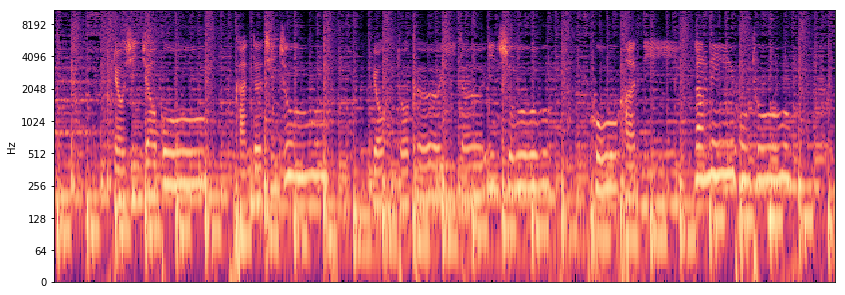

In [4]:
# Values based on (Chao-Ling, 2004)  -  If want to use other values, need to adjust labels
wl = int(sr*40/1000) # 40 milisseconds
hl = int(sr*20/1000) # 20 milisseconds

S = librosa.stft(y, win_length=wl, hop_length=hl)
D = librosa.amplitude_to_db(S, ref=np.max)
D /= D.max() # Normalized Spectrogram
librosa.display.specshow(D, y_axis='log')

print (D.shape)

(579,)


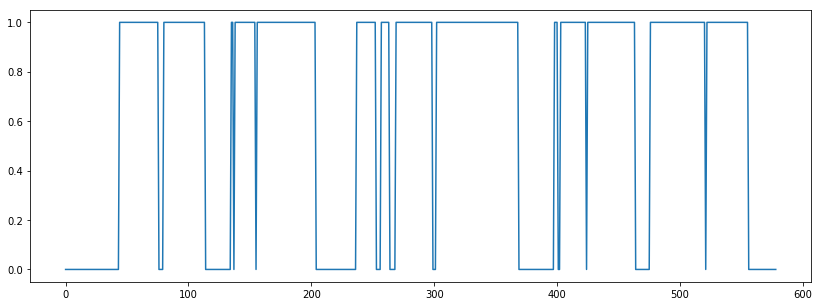

In [5]:
vocal_path = os.path.join(os.environ['VOCAL_PATH'])

label = pd.read_csv(vocal_path, index_col=None, header=None)
label  = np.array(label).reshape((label.shape[0],)).astype('bool')

print (label.shape)
plt.plot(label)
plt.show()

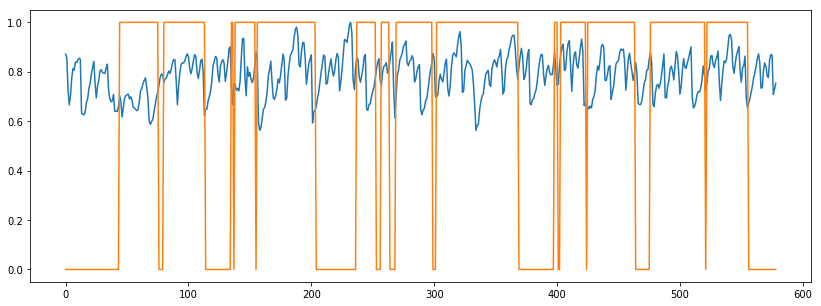

In [6]:
# w(x) = 1, for all x  - is the same of sum everything

# Calculate energy for each audio signal frame
energy = [np.sum([np.abs(x) for x in D[:,idx]]) for idx in range(label.shape[0])] # List comprehension
    
# Normalize energy
energy /= np.median(energy)
energy /= energy.max()
plt.plot(energy)
plt.plot(label)
plt.show()

In [7]:
import sys
sys.path.append("/usr/local/lib/python2.7/dist-packages")
import essentia.standard as ess

In [8]:
energy_band = ess.EnergyBand(sampleRate=sr, startCutoffFrequency=200, stopCutoffFrequency=1800)

In [9]:
energy = [energy_band(D[:,i]) for i in range(1,D.shape[1]-1)] # Does it work??? I can't know...

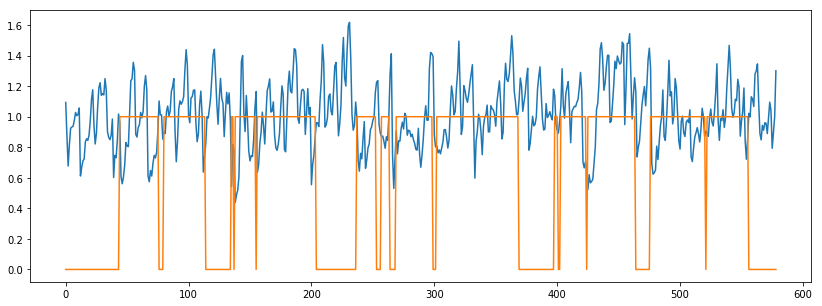

In [10]:
energy_median = np.median(energy)
plt.plot((energy/energy_median))
plt.plot(label)
plt.show()

** These two function are the input for SVM train algorithm **

Energy and Label


Ellis used linear and RBF kernels for this SVM. 
He compared:
- All voiced
- Energy Threshold
- Linear SVM
- RBF SVM

Results for:
- Voice Detection
- False Alarms
- d' (gives a threshold-independent measure of the separation between two Gaussian distributions that would exhibit this performance)
- Accuracy



(579,)
0.8


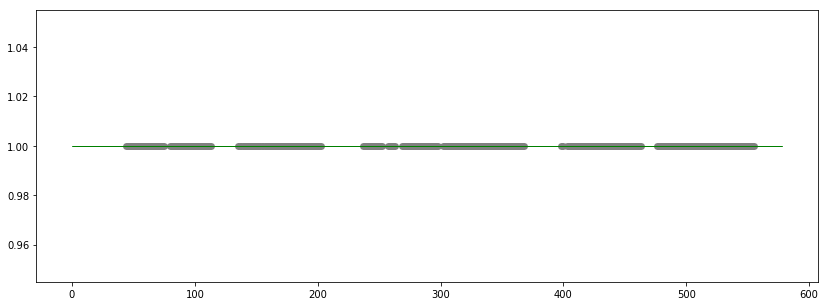

In [11]:
energy = np.array(energy)
print (energy.shape)

plt.plot([None if x == 0 else x for x in label], lw=7.0, solid_capstyle='round', color='gray')

plt.plot(all_true_predict(energy), lw=1.0, solid_capstyle='round', color='green')

energy_threshold_fit(energy, label)
plt.plot([None if x == 0 else x for x in energy_threshold_predict(energy)], lw=3.0, solid_capstyle='round', color='red')

In [ ]:
# Create and fit model
vad_lin = svm.SVC(kernel='linear')
vad_lin.fit(energy.reshape(-1,1), label)

In [ ]:
# Predict new values
pred = vad_lin.predict(energy.reshape(-1,1))
plt.figure(figsize=(18,6))
plt.plot(pred)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
# Create and fit model
vad_rbf = svm.SVC(kernel='rbf')
vad_rbf.fit(energy.reshape(-1,1), label)

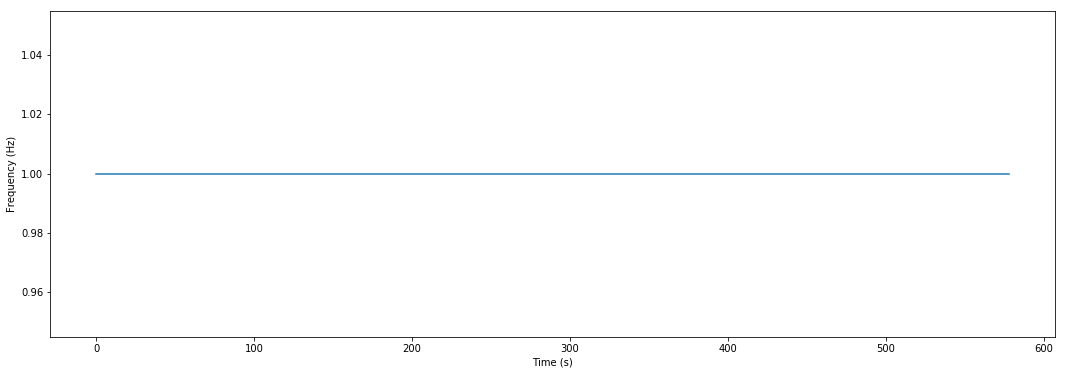

In [11]:
# Predict new values
pred = vad_rbf.predict(energy.reshape(-1,1))
plt.figure(figsize=(18,6))
plt.plot(pred)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

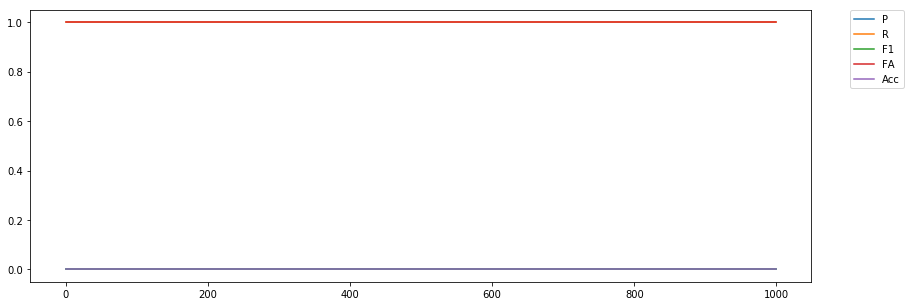

(0, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
find_threshold(label, energy)
    